In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pujithamaddineni","key":"36a6a2fede854e31574fbe4b31958b2d"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d nischaydnk/isic-2019-jpg-224x224-resized


Dataset URL: https://www.kaggle.com/datasets/nischaydnk/isic-2019-jpg-224x224-resized
License(s): CC0-1.0
 96% 340M/355M [00:00<00:00, 633MB/s]
100% 355M/355M [00:00<00:00, 659MB/s]


In [5]:
!unzip isic-2019-jpg-224x224-resized.zip -d isic2019


Streaming output truncated to the last 5000 lines.
  inflating: isic2019/train-image/image/ISIC_0065357.jpg  
  inflating: isic2019/train-image/image/ISIC_0065358.jpg  
  inflating: isic2019/train-image/image/ISIC_0065359.jpg  
  inflating: isic2019/train-image/image/ISIC_0065360.jpg  
  inflating: isic2019/train-image/image/ISIC_0065361.jpg  
  inflating: isic2019/train-image/image/ISIC_0065362.jpg  
  inflating: isic2019/train-image/image/ISIC_0065366.jpg  
  inflating: isic2019/train-image/image/ISIC_0065367.jpg  
  inflating: isic2019/train-image/image/ISIC_0065368.jpg  
  inflating: isic2019/train-image/image/ISIC_0065370.jpg  
  inflating: isic2019/train-image/image/ISIC_0065371.jpg  
  inflating: isic2019/train-image/image/ISIC_0065372.jpg  
  inflating: isic2019/train-image/image/ISIC_0065374.jpg  
  inflating: isic2019/train-image/image/ISIC_0065376.jpg  
  inflating: isic2019/train-image/image/ISIC_0065377.jpg  
  inflating: isic2019/train-image/image/ISIC_0065378.jpg  
  inf

In [6]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

In [8]:
# === Load Dataset ===
df = pd.read_csv("/content/isic2019/train-metadata.csv")
df['image'] = df['isic_id'] + '.jpg'
df['label'] = df['target'].astype(str)

In [9]:
# === Clean Invalid Images ===
image_dir = '/content/isic2019/train-image/image'
all_files = set(os.listdir(image_dir))
df = df[df['image'].isin(all_files)]

In [10]:
# === Split Dataset ===
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# === Image Size and Params ===
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20

In [11]:


# === Data Augmentation ===
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='image',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col='image',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 20264 validated image filenames belonging to 2 classes.
Found 5067 validated image filenames belonging to 2 classes.


Class Weights: {0: np.float64(0.6086381930678201), 1: np.float64(2.8012164777439867)}
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 388s 486ms/step - accuracy: 0.5932 - loss: 0.7824 - val_accuracy: 0.2420 - val_loss: 53.7153 - learning_rate: 1.0000e-04
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 262s 413ms/step - accuracy: 0.6704 - loss: 0.5983 - val_accuracy: 0.7588 - val_loss: 0.6525 - learning_rate: 1.0000e-04
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 260s 409ms/step - accuracy: 0.7259 - loss: 0.5183 - val_accuracy: 0.7884 - val_loss: 0.5707 - learning_rate: 1.0000e-04
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 262s 413ms/step - accuracy: 0.7416 - loss: 0.4941 - val_accuracy: 0.1954 - val_loss: 319.8908 - learning_rate: 1.0000e-04
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.7638 - loss: 0.4732
Epoch 5: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
634/634 ━━━━━━━━━━━━━━━━━━━━ 264s 415ms/step - accuracy: 0.7638 - loss: 0.4732 - val_accuracy: 0.2864 - val_loss: 336.3444 - learning_rate: 1.0000e-04
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2

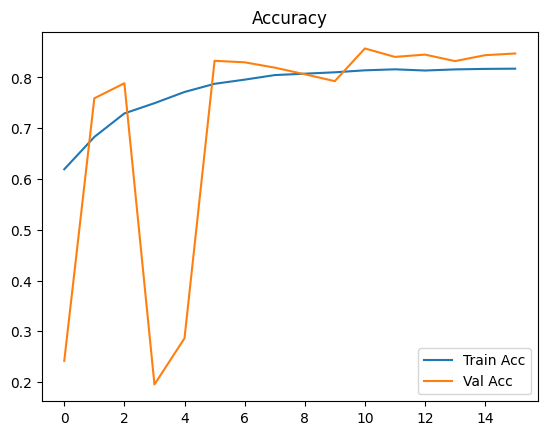

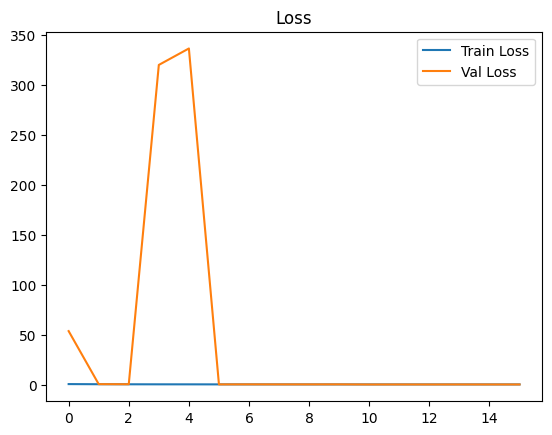

159/159 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step
              precision    recall  f1-score   support

      Benign       0.94      0.88      0.91      4162
   Malignant       0.58      0.76      0.65       905

    accuracy                           0.86      5067
   macro avg       0.76      0.82      0.78      5067
weighted avg       0.88      0.86      0.86      5067



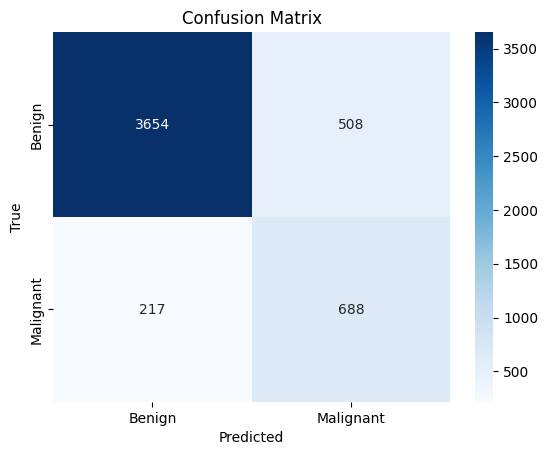

In [12]:


# === Class Weights ===
train_df['label_int'] = train_df['label'].astype(int)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['label_int']),
    y=train_df['label_int']
)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

# === Model Architecture ===
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = True  # Fine-tune entire base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

# === Compile Model ===
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# === Callbacks ===
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.3, verbose=1)

# === Train Model ===
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr]
)

# === Evaluate ===
loss, acc = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {acc:.4f} | Loss: {loss:.4f}")

# === Plot Accuracy ===
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy"); plt.show()

# === Plot Loss ===
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss"); plt.show()

# === Classification Report ===
val_generator.reset()
preds = model.predict(val_generator)
preds_binary = (preds > 0.5).astype(int)
true_labels = val_generator.classes

print(classification_report(true_labels, preds_binary, target_names=['Benign', 'Malignant']))

# === Confusion Matrix ===
cm = confusion_matrix(true_labels, preds_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
